In [1]:
import os
import cv2
from FaceRecognitionSystem import FaceRecognitionSystem
fr = FaceRecognitionSystem()

2.2.0


In [6]:
import numpy as np
known, id_list = fr.getEmbeddingsList()
known = np.array(known)
names = [fr.db[i] for i in id_list]

In [7]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

X = known

y = id_list

target_names = names

In [8]:
n_components = 2
X_pca = PCA(n_components=n_components).fit_transform(X)

<Figure size 432x288 with 0 Axes>

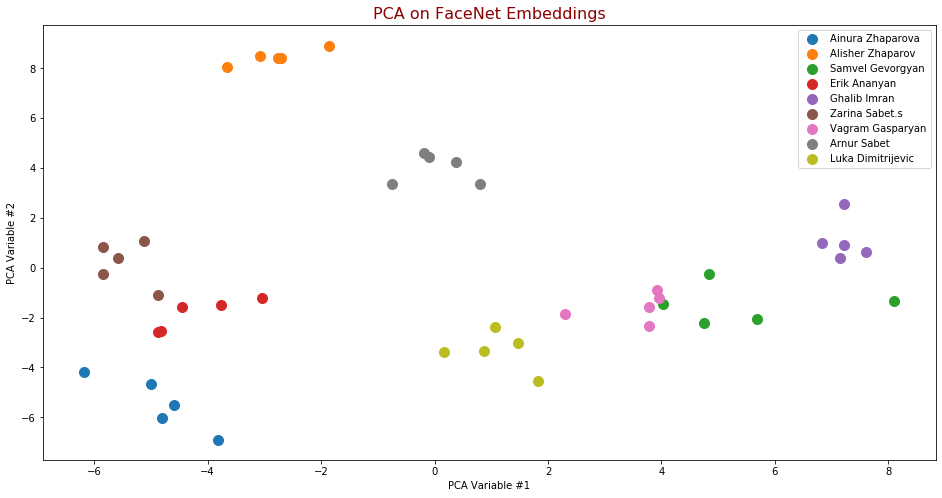

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig, ax = plt.subplots(figsize=(16,8))
#ax = fig.add_subplot(111, projection='3d')

font = {'color':  'darkred',
        'weight': 'normal',
        'size': 16,}

target_names_unique = list(fr.db.values())
# Plot the compressed data points
#ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y, s=60)
for i in range(len(np.unique(y))):
    ax.scatter(X_pca.reshape(9,5,2)[i,:,0], 
               X_pca.reshape(9,5,2)[i,:,1], 
               #X_pca.reshape(9,5,3)[i,:,2],  
               s=100, 
               label=target_names_unique[i])

#ax.view_init(30, 185)
plt.title("PCA on FaceNet Embeddings", loc="center", fontdict=font)
ax.set_xlabel('PCA Variable #1')
ax.set_ylabel('PCA Variable #2')
#ax.set_zlabel('PCA Variable #3')

ax.legend()
           #scatterpoints=5,
           #loc='lower left',
           #ncol=3,
           #fontsize=8)


#ax.set_zlabel('PCA Variable #2')
#plt.savefig('pca_3d_facenet.png')
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# train a neural network
#from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
print("Fitting the classifier to the training set")
#clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=2, verbose=True, early_stopping=True).fit(X_train, y_train)
#clf = SVC(probability=True)
#clf = KNN(n_neighbors=5)
clf = LogisticRegression()

Fitting the classifier to the training set


In [12]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y_pred = clf.predict(X_test)
#print(classification_report(y_test, y_pred, target_names=target_names))

In [14]:
y_test

[2, 6, 1, 8, 2, 3, 8, 1, 1]

In [15]:
y_pred

array([2, 6, 1, 8, 2, 3, 8, 1, 1])

In [16]:
img = cv2.cvtColor(cv2.imread("/Users/newuser/Projects/facialdetection/FaceRecognition/custom/hamza1.jpg"), cv2.COLOR_BGR2RGB)
img.shape
embeddings = fr.faceEmbeddings(img)
embeddings

array([[ 0.64031935, -0.59932876, -0.85814136, -1.0975579 ,  0.3988283 ,
         1.9992628 , -1.0557518 ,  1.5634239 ,  0.81227446,  1.2143835 ,
        -0.57570535, -0.63705057, -1.419529  , -0.51036286,  0.11672235,
         1.1331576 ,  2.632159  ,  0.17998464,  0.6723833 , -0.48146334,
         0.00501593,  0.03559525,  1.966887  ,  0.28416073, -1.663756  ,
         0.67382485, -0.7334304 , -0.8590832 , -0.21451972,  0.01156678,
        -0.29213884, -0.7894021 ,  0.551188  , -0.2844162 ,  1.9796907 ,
         1.9898882 , -0.43133032,  0.51728237,  0.9703883 , -0.34912738,
        -1.0168545 , -1.2086514 ,  0.47537535, -0.51433426,  0.6776504 ,
        -0.66176236, -0.8397265 ,  0.29660958,  0.15952413, -0.09947853,
         1.7732819 , -0.15899602, -1.0338606 ,  0.19215286,  0.6226639 ,
         0.0180309 , -1.0984043 , -0.49956372, -1.32715   , -0.9672087 ,
        -2.0231097 , -1.5208951 ,  1.6330059 ,  0.48109627,  1.2614844 ,
         0.0810212 ,  0.1758785 ,  0.8336761 ,  0.6

In [17]:
y_pred_prob = clf.predict_proba(embeddings)
np.argmax(y_pred_prob)

8

In [18]:
clf.predict(embeddings)

array([9])

In [50]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [39]:
target_names_clean =[target_names[i] for i in range(0, len(target_names), 5)]

In [42]:
target_names_clean

['Ainura Zhaparova',
 'Alisher Zhaparov',
 'Samvel Gevorgyan',
 'Erik Ananyan',
 'Ghalib Imran',
 'Zarina Sabet.s',
 'Vagram Gasparyan',
 'Arnur Sabet',
 'Luka Dimitrijevic']

In [46]:
y_test

[7, 4, 3, 5, 8, 7, 7, 2, 4]

In [47]:
y_pred

array([[0.02845312, 0.00265602, 0.14861588, 0.01487888, 0.03421428,
        0.0190387 , 0.02898278, 0.7138388 , 0.00932154],
       [0.01055782, 0.0991278 , 0.01733612, 0.00747503, 0.64288304,
        0.01859253, 0.09193267, 0.06402195, 0.04807303],
       [0.03055183, 0.00694201, 0.00399   , 0.90421515, 0.00583452,
        0.01727523, 0.01555566, 0.00225699, 0.0133786 ],
       [0.00510012, 0.01098795, 0.00717246, 0.00260114, 0.00254522,
        0.95066949, 0.0138524 , 0.00489484, 0.00217639],
       [0.02484273, 0.00475588, 0.00520309, 0.01045058, 0.00219854,
        0.01090704, 0.0094318 , 0.01883712, 0.91337323],
       [0.00535283, 0.00810838, 0.11182987, 0.02819668, 0.02022572,
        0.03991351, 0.18081671, 0.59078858, 0.01476771],
       [0.00490414, 0.00200349, 0.2924971 , 0.01277007, 0.00837087,
        0.03169057, 0.04820717, 0.59563824, 0.00391835],
       [0.00456604, 0.02715386, 0.90313345, 0.00414703, 0.02148261,
        0.00851105, 0.01655354, 0.00353619, 0.01091623],


In [52]:
labels_encoded

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5]

In [58]:
for i in range(10):
    if i > 4:
        print(i)
    else:
        print("continuing")
        continue
    print("after continue")

continuing
continuing
continuing
continuing
continuing
5
after continue
6
after continue
7
after continue
8
after continue
9
after continue


In [59]:
fr.db

{'57dd3ad7-e529-494f-b55e-77819b54a552': 'Ainura Zhaparova',
 '87ba0926-24d5-4e84-88fc-a3444b2357bb': 'Alisher Zhaparov',
 '101e5994-61a6-4c43-af9e-20166a55677a': 'Samvel Gevorgyan',
 '5b0c69e7-01a5-4b42-8612-c1030ab5fe22': 'Erik Ananyan',
 'ef782f12-141d-4381-922a-bee3b6145c99': 'Ghalib Imran',
 '4aa0ae2a-b84b-4e73-9e7b-cf93774ee313': 'Zarina Sabet.s',
 '2de440d8-99e0-4828-acf0-448c31379fa5': 'Vagram Gasparyan',
 'da54fd89-4c11-4cf4-b63d-1ea9aaa0ed5b': 'Arnur Sabet',
 '4dac2f3d-7dbe-4986-91ba-9b86c76242ea': 'Luka Dimitrijevic'}

In [6]:
import numpy as np
right_eye_center = (4,3)
left_eye_center = (2,2)
dY = right_eye_center[1] - left_eye_center[1]
print(dY)
dX = right_eye_center[0] - left_eye_center[0]
print(dX)
angle = np.degrees(np.arctan2(dY, dX))
print(angle)

1
2
26.56505117707799
